<a href="https://colab.research.google.com/github/azarmlengineer/Projects/blob/main/Flight_price_prediction/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
df = pd.read_excel("/content/drive/MyDrive/Projects/Data-science/Flight_Price_prediction/Data_Train.xlsx")

In [116]:
df.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [117]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [119]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [120]:
df['Total_Stops'].isnull()

,Total_Stops
0,False
1,False
2,False
3,False
4,False
...,...
10678,False
10679,False
10680,False
10681,False


In [121]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [122]:
df.dropna(inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [124]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [125]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.4 MB


In [126]:
data = df.copy()

In [127]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [128]:
def change_into_datetime(col):
  data[col] = pd.to_datetime(data[col])

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [130]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_datetime(feature)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.2+ MB


In [132]:
data['Date_of_Journey'].dt.day

,Date_of_Journey
0,24
1,1
2,9
3,12
4,1
...,...
10678,9
10679,27
10680,27
10681,1


In [133]:
data['Date_of_Journey'].dt.month

,Date_of_Journey
0,3
1,5
2,6
3,5
4,3
...,...
10678,4
10679,4
10680,4
10681,3


In [134]:
data['Date_of_Journey'].dt.year

,Date_of_Journey
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
10678,2019
10679,2019
10680,2019
10681,2019


In [135]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [136]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-28 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-28 05:50:00,2025-06-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [137]:
def extract_hour_min(df,col):
  data[col+"_hour"] = data[col].dt.hour
  data[col+"_minute"] = data[col].dt.minute
  data.head(3)

In [138]:
extract_hour_min(data,'Dep_Time')

In [139]:
extract_hour_min(data,'Arrival_Time')

In [140]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-28 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-28 05:50:00,2025-06-28 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [141]:
cols_to_drop = ['Dep_Time','Arrival_Time']
data.drop(columns=cols_to_drop,inplace=True)

In [142]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [143]:
def flight_dep_time(x):
  if (x>4) and (x<=8):
    return "Early Morning"
  elif (x>8) and (x<=12):
    return "morning"
  elif(x>16) and (x<=20):
    return "Evening"
  elif (x>20) and (x<=24):
    return "Night"
  else:
    return "late Night"

In [144]:
data['Dep_Time_hour'].apply(flight_dep_time)

,Dep_Time_hour
0,Night
1,Early Morning
2,morning
3,Evening
4,late Night
...,...
10678,Evening
10679,Evening
10680,Early Morning
10681,morning


In [145]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [146]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [147]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

,count
Dep_Time_hour,
Early Morning,2880
Evening,2357
morning,2209
late Night,2196
Night,1040


<Axes: xlabel='Dep_Time_hour'>

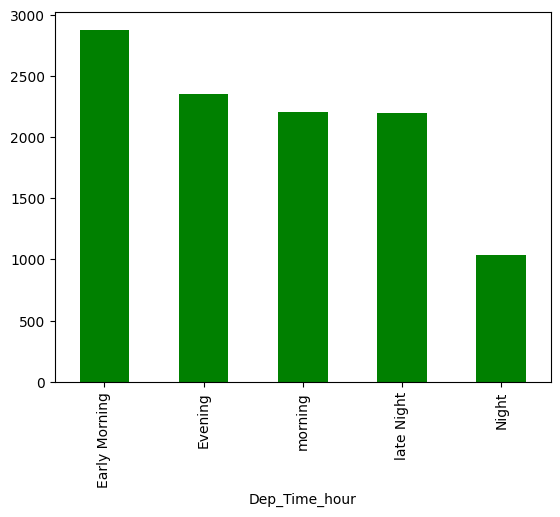

In [148]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar',color='green')

In [149]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot,init_notebook_mode,download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [150]:
def preprocess_duration(x):
  if 'h' not in x:
    x = '0h'+ " " + x
  elif 'm' not in x:
    x = x + " " + '0m'
  return x

In [151]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [152]:
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [153]:
'2h 1m'.split(' ')

['2h', '1m']

In [154]:
'2h 1m'.split(' ')[0]

'2h'

In [155]:
'2h 1m'.split(' ')[0][-2]

'2'

In [156]:
'2h 1m'.split(' ')[0][0:-1]

'2'

In [157]:
int('2h 1m'.split(' ')[0][0:-1])

2

In [158]:
type(int('2h 1m'.split(' ')[0][0:-1]))

int

In [159]:
x = '2h 1m'
y = lambda x: int(x.split(' ')[0][0:-1])

In [160]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [161]:
data['Duartion_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [162]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duartion_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [163]:
2*60

120

In [164]:
'2*60'

'2*60'

In [165]:
eval('2*60')

120

In [166]:
data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

,Duration
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [167]:
data['Duartion_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [168]:
data['Duartion_total_mins']

,Duartion_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


<Axes: xlabel='Duartion_total_mins', ylabel='Price'>

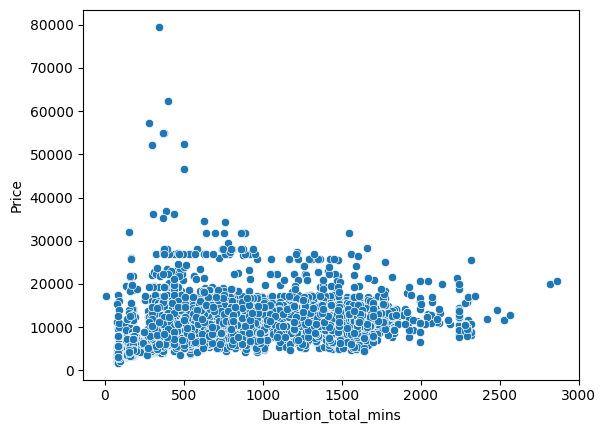

In [169]:
sns.scatterplot(x='Duartion_total_mins',y='Price',data=data)

<Axes: xlabel='Duartion_total_mins', ylabel='Price'>

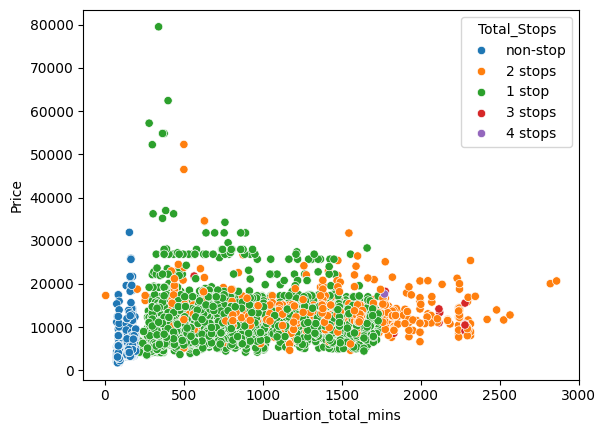

In [170]:
sns.scatterplot(x='Duartion_total_mins',y='Price', hue ='Total_Stops' ,data=data)

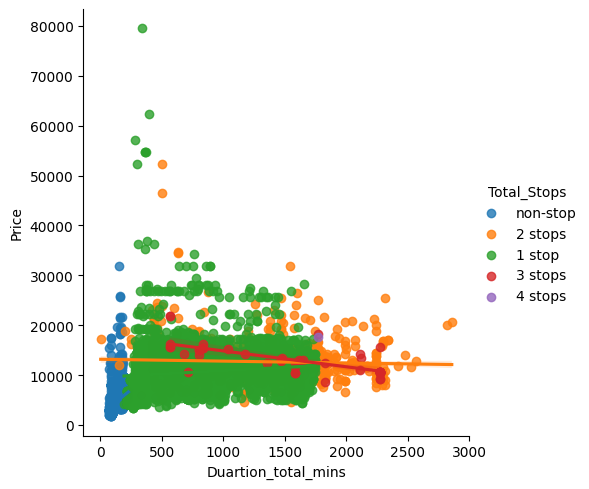

In [171]:
sns.lmplot(x='Duartion_total_mins',y='Price', hue ='Total_Stops' ,data=data)

In [172]:
data['Airline'] == 'Jet Airways'

,Airline
0,False
1,False
2,True
3,False
4,False
...,...
10678,False
10679,False
10680,True
10681,False


In [173]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
DEL → JAI → BOM → COK,207
BOM → HYD,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


<Axes: xlabel='Airline', ylabel='Price'>

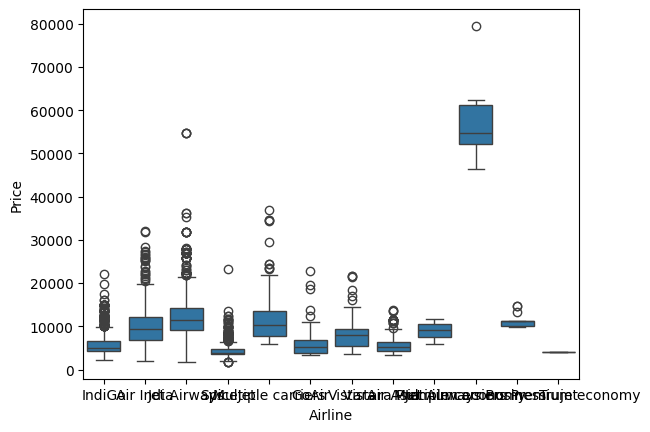

In [174]:
sns.boxplot(x='Airline',y='Price',data=data)

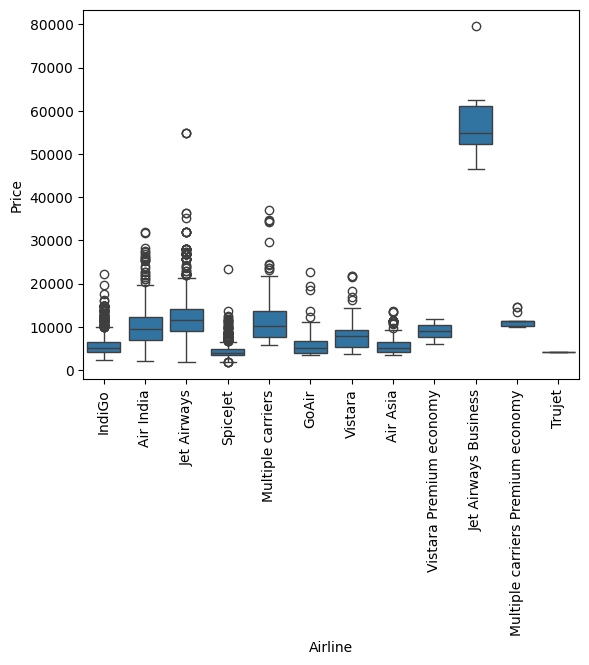

In [175]:
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

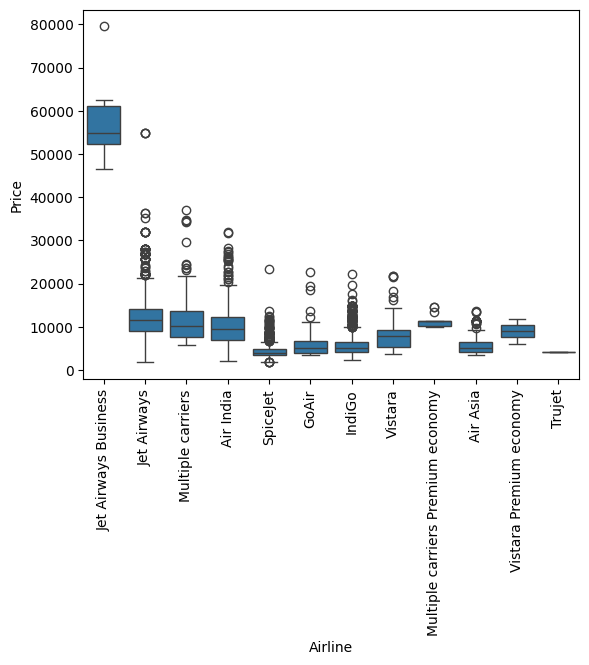

In [176]:
sns.boxplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [177]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [178]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [179]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [180]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duartion_mins',
 'Duartion_total_mins']

In [181]:
for sub_categori in data['Source'].unique():
  data['Source_'+ sub_categori] = data['Source'].apply(lambda x : 1 if x==sub_categori else 0)

In [182]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duartion_mins,Duartion_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [183]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [184]:
data['Airline'].nunique()

12

In [185]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [186]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [187]:
dict_airlines = {key:index for index,key in enumerate(airlines,0)}

In [188]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [189]:
data['Airline'].map(dict_airlines)

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


In [190]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [191]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [192]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [193]:
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [194]:
dict_dest = {key:index for index,key in enumerate(destination,0)}

In [195]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [198]:
data['Destination'] = data['Destination'].map(dict_dest)

In [199]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duartion_mins,Duartion_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
